# **3.Correlation Analysis**

## Objectives
1. Data exploration: understand the relationships between various features and the target variable ('SalePrice') in a dataset ('HousePricesCleaned.csv')
2. Correlation analysis: analyze correlations (Pearson and Spearman) and predictive power score (PPS) to identify important features related to 'SalePrice'.
3. Visualizations: create heatmaps, scatter plots, box plots to better understand feature relationships and their impact on 'SalePrice'.
4. Extract meaningful insights to guide further analysis or model development.

## Inputs
* Dataset:'HousePricesCleaned.csv'

## Outputs
* Correlation heatmaps
* PPS heatmap
* Top features
* Scatter plots
* Box plots

---

# Change working directory

Change the working directory from its current folder to its parent folder.
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp'

---

# Data exploration and correlation analysis

In [4]:
import pandas as pd
df1 = pd.read_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/HousePricesCleaned.csv")
df1.head(5)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.000000,No,706,GLQ,150,548.0,RFn,2003.0,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500
1,1262.0,0.0,3.000000,Gd,978,ALQ,284,460.0,RFn,1976.0,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500
2,920.0,866.0,3.000000,Mn,486,GLQ,434,608.0,RFn,2001.0,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500
3,961.0,0.0,2.869214,No,216,ALQ,540,642.0,Unf,1998.0,...,9550.0,60.0,0.0,35.0,5,7,756.0,1915,1970,140000
4,1145.0,0.0,4.000000,Av,655,GLQ,490,836.0,RFn,2000.0,...,14260.0,84.0,350.0,84.0,5,8,1145.0,2000,2000,250000


Since the whole dataset has 4 categorical variables that are of object data type then it is needed that those data types would be encoded into numerical in order to calculate correlation coefficients.

Use OneHotEncoder since that will encode the categories into 0 or 1. Thus making more columns with each categorical meaning. Which enables to evaluate each of categorical values relation coefficient to Sale Price.

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df1, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df1.columns[df1.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df1)
print(df_ohe.shape)
df_ohe.columns.tolist()


(1460, 38)


['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice',
 'BsmtExposure_No',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_Av',
 'BsmtExposure_None',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_Unf',
 'BsmtFinType1_Rec',
 'BsmtFinType1_None',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_LwQ',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageFinish_None',
 'GarageFinish_Fin',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'KitchenQual_Ex',
 'KitchenQual_Fa']

Through encoding, the modified dataset has now 38 columns.

Now it is defined functions that will calculate the correlations, create heatmaps and display them.

The heatmaps are going to be saved so they can be used later in the documentation.

This code bit has been taken from Code Institute's churnometer

Create folders first

In [7]:
import numpy as np
import ppscore as pps
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt

def heatmap_corr(df, threshold, figsize=(20,12), font_annot = 8):
    """
    Function to create heatmap using correlations
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()

def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    """
    Function to create heatmap using pps.
    """
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                        mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                        linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()

def CalculateCorrAndPPS(df):
    """
    Function to calculate correlations and pps.
    """
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method='pearson')

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix

def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                        figsize=(20, 12), font_annot=8):
    """
    Function to display the correlations and pps.
    """

    print("\n")
    print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyze multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns. \n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

A function is called which calculates the correlation and pps. Spearman and Pearson correlations are passed to evaluate the linear and monotonic relationships respectively between the features and the target.

In [8]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_ohe)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

          count  mean    std  min  25%  50%  75%    max
ppscore  1406.0  0.02  0.072  0.0  0.0  0.0  0.0  0.919


The distribution of PPS scores reveals a skewed pattern heavily concentrated at zero, suggesting a prevalence of weak predictive relationships. Despite the majority of scores being low, the presence of outliers with values up to 0.945 indicates sporadic instances of strong predictive power. Therefore, determining a suitable threshold for the heatmap should balance capturing both the common weak relationships and the occasional strong ones.

Display the correlations and pps by calling the DisplayCorrAndPPS function that was defined above



* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



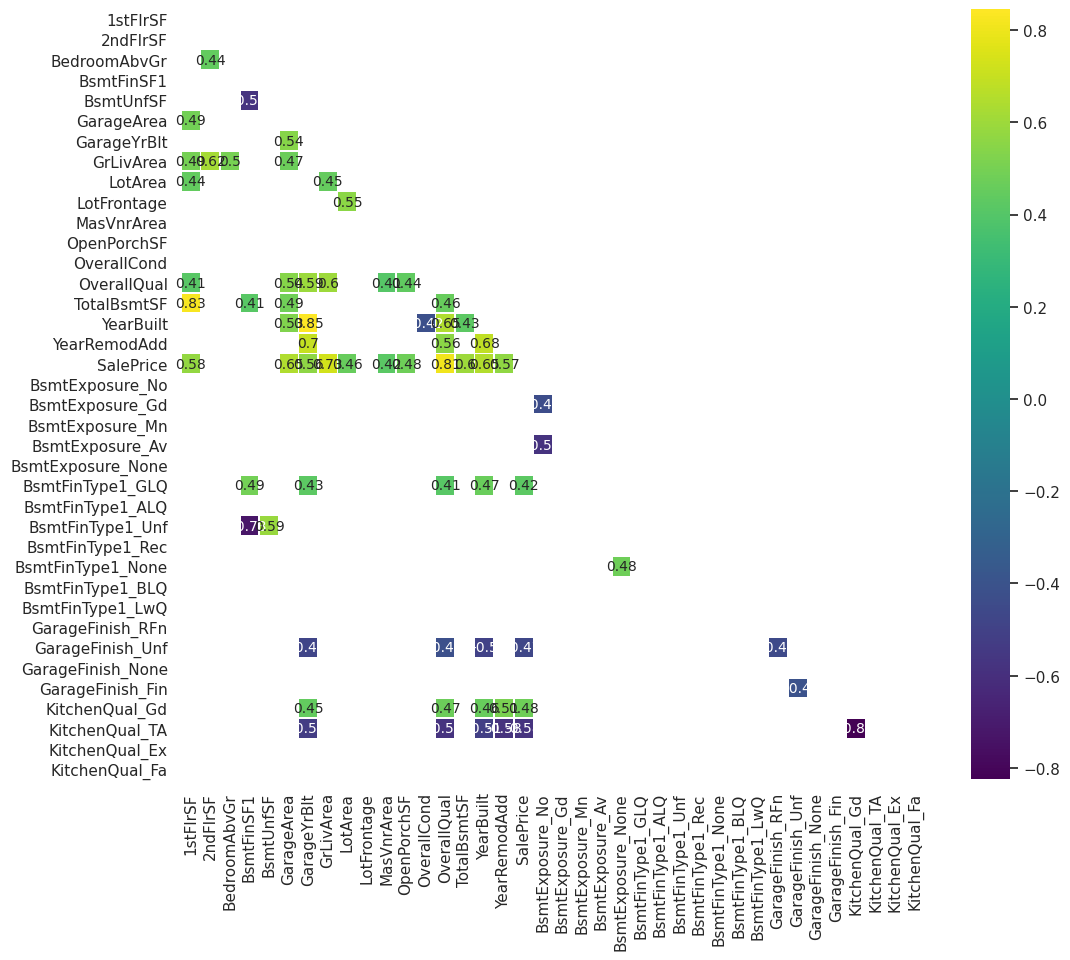



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continous variables 



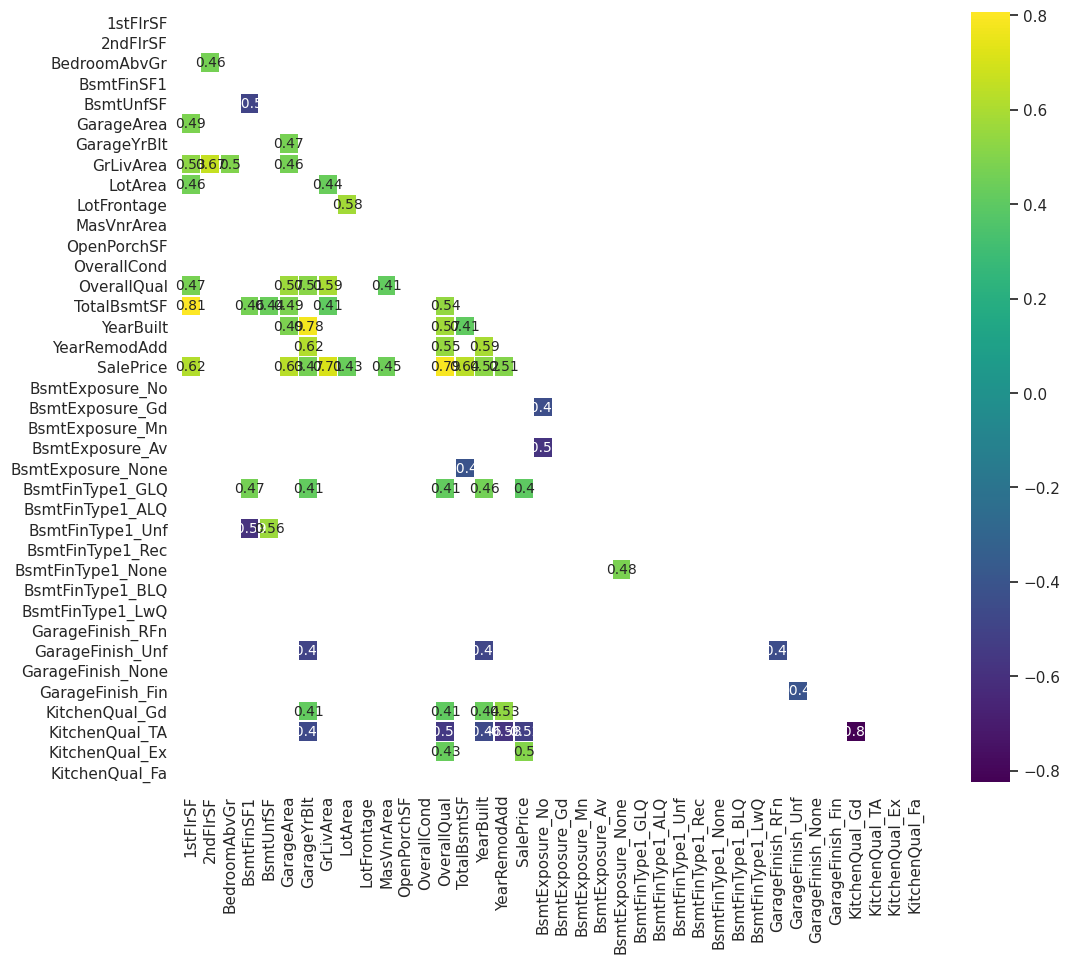



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns. 
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



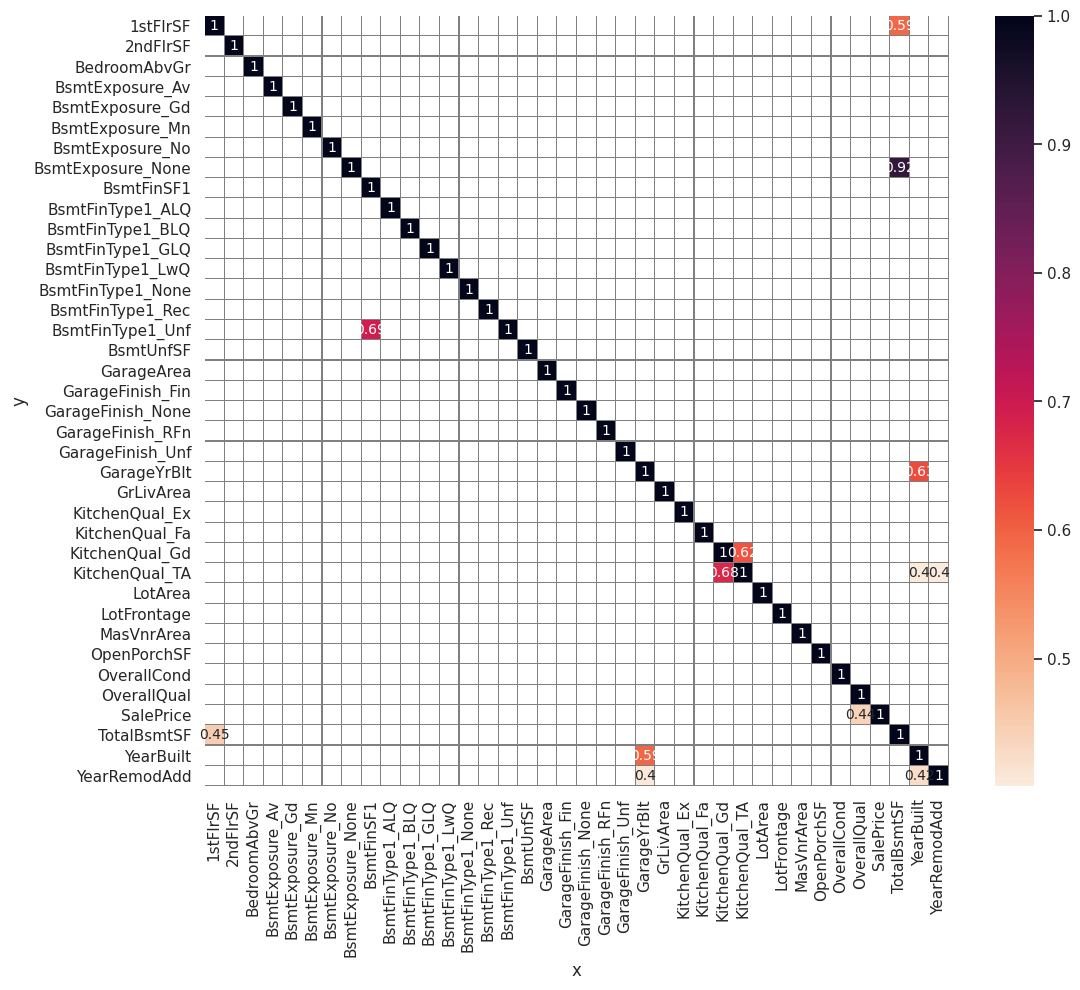

In [9]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                    df_corr_spearman = df_corr_spearman,
                    pps_matrix = pps_matrix,
                    CorrThreshold = 0.4, PPS_Threshold = 0.4,
                    figsize=(12, 10), font_annot=10)

When the correlations are calculated with the .corr() method, the return value is a pandas series, and the first item is the correlation between SalePrice and SalePrice. Since it is correlation between itself then [1:] is used to exclude it from the series.
Next, sort the remaining values considering the absolute value, which is done by setting key=abs.
Top 10 values are going to be shown.

In [10]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_spearman_positive = corr_spearman[corr_spearman > 0].head(10)
corr_spearman_positive

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649438
TotalBsmtSF       0.602754
1stFlrSF          0.575419
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Gd    0.478583
OpenPorchSF       0.477889
Name: SalePrice, dtype: float64

In [11]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:]
corr_pearson_positive = corr_pearson[corr_pearson > 0]
corr_pearson_positive

OverallQual         0.790982
GrLivArea           0.708624
TotalBsmtSF         0.636999
GarageArea          0.630138
1stFlrSF            0.620743
YearBuilt           0.522897
YearRemodAdd        0.507101
KitchenQual_Ex      0.504094
GarageYrBlt         0.466754
MasVnrArea          0.448618
LotArea             0.432216
BsmtFinType1_GLQ    0.400764
BsmtFinSF1          0.386420
GarageFinish_Fin    0.376918
LotFrontage         0.371542
OpenPorchSF         0.369024
KitchenQual_Gd      0.321641
2ndFlrSF            0.308928
BsmtExposure_Gd     0.307298
BsmtUnfSF           0.214479
BedroomAbvGr        0.154476
GarageFinish_RFn    0.148970
BsmtExposure_Av     0.136793
BsmtExposure_Mn     0.043493
Name: SalePrice, dtype: float64

Now combine the both correlations.

In [12]:
combined_corr = pd.concat([corr_spearman_positive, corr_pearson_positive])
combined_corr = combined_corr.groupby(combined_corr.index).max().sort_values(ascending=False)
top_10_features = combined_corr.head(11)

print(top_10_features)

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649438
TotalBsmtSF       0.636999
1stFlrSF          0.620743
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Ex    0.504094
KitchenQual_Gd    0.478583
OpenPorchSF       0.477889
Name: SalePrice, dtype: float64


It was taken 11 values since while analyzing this dataset KitchenQual_Ex and KitchenQual_Gd both were included in the list. However it was needed 10 different features thus KitchenQual Ex/Gd in general can be seen as high importance.

The variables that are going to be focused on:
1. OverallQual
2. GrLivArea
3. YearBuilt
4. GarageArea
5. TotalBsmtSF
6. 1stFlrSF
7. YearRemodAdd
8. GarageYrBlt
9. KitchenQual
10. OpenPorchSF

---

## EDA on the variables

An exploratory analysis is made. Firstly with scatter plots, which are effective for visualizing relationships between two continous variables.

In [13]:
vars_to_study1 = [ 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt', 'OpenPorchSF']

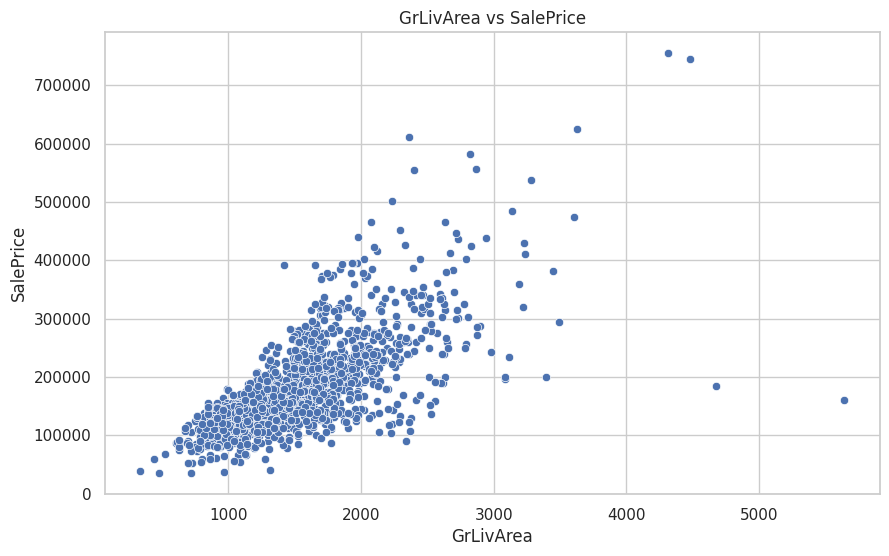

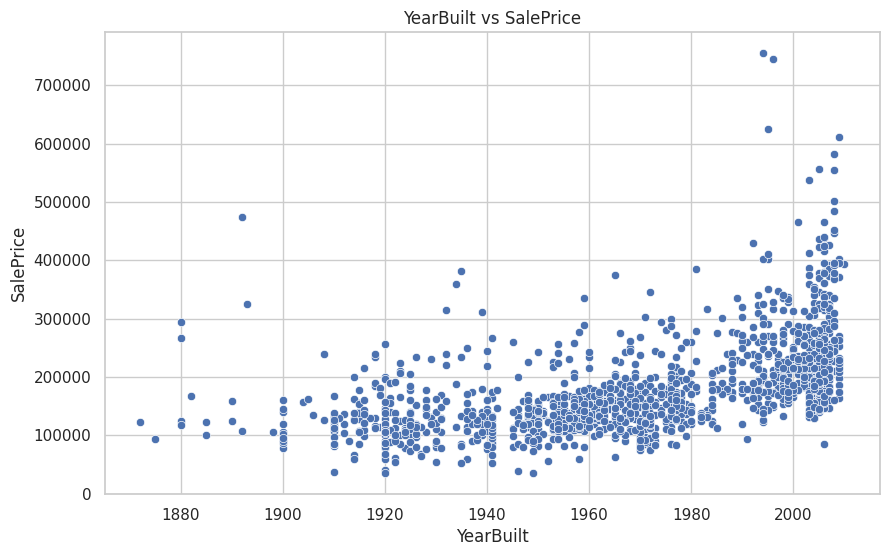

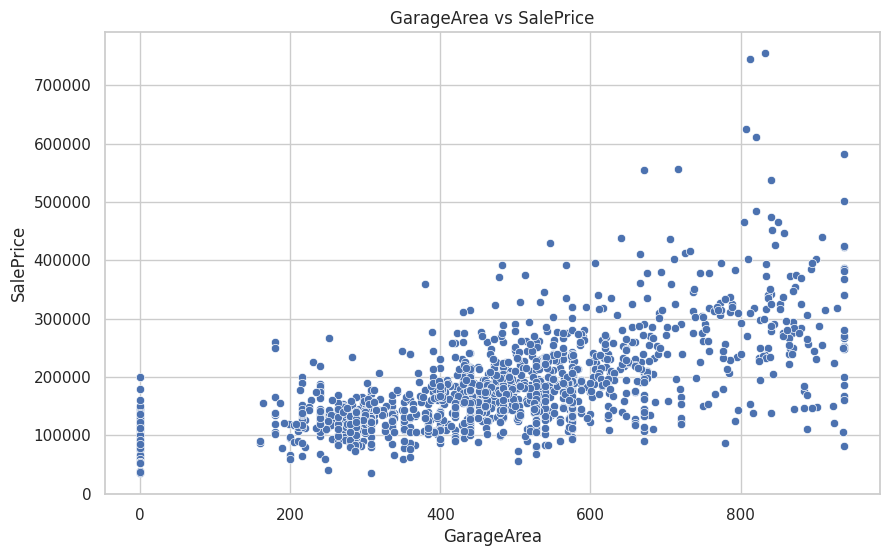

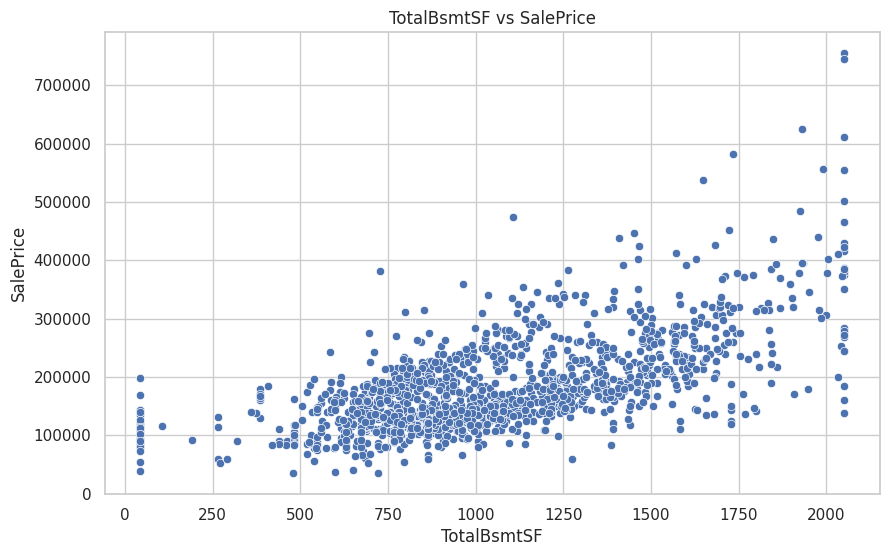

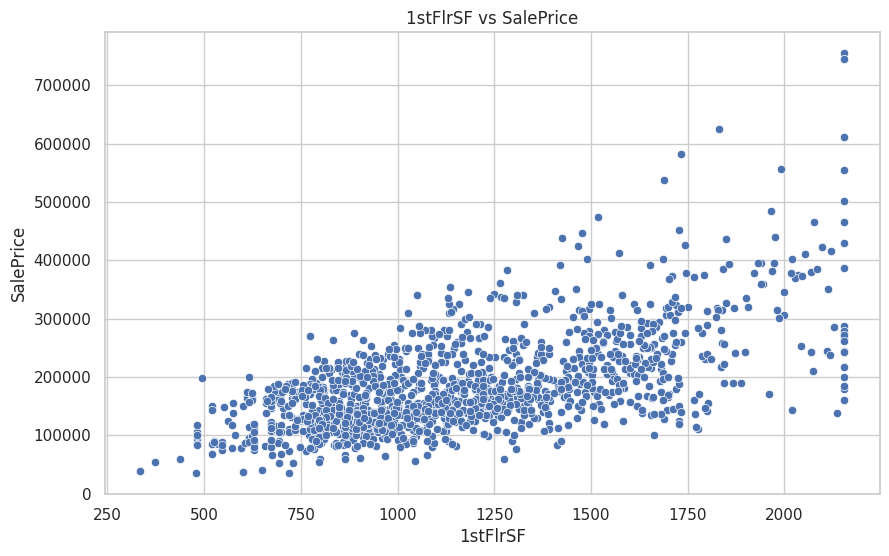

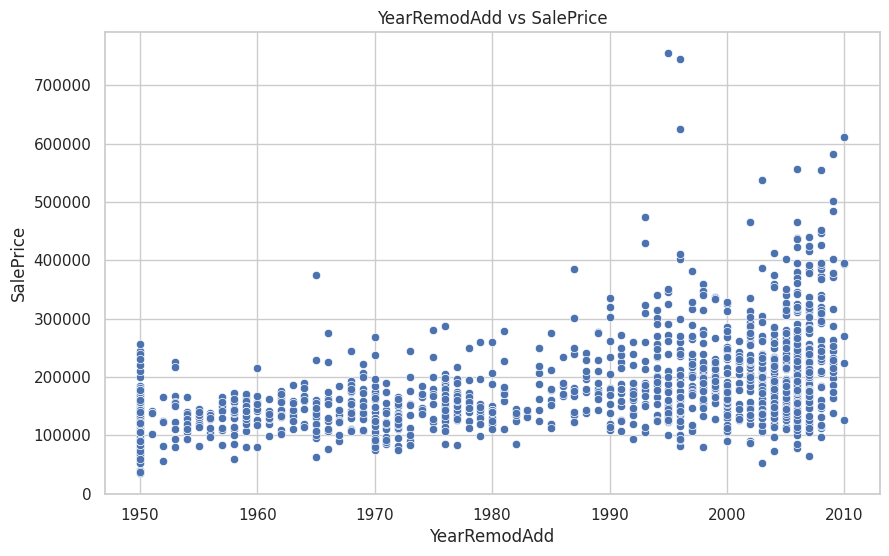

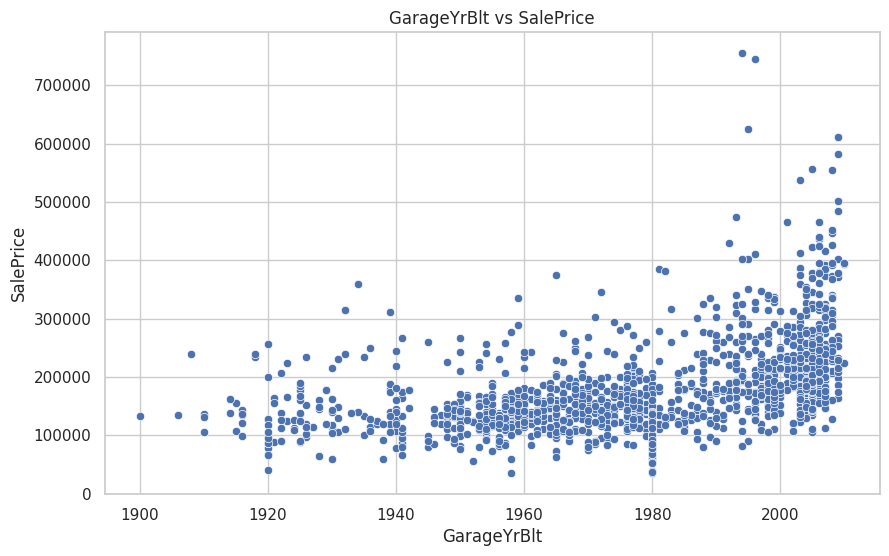

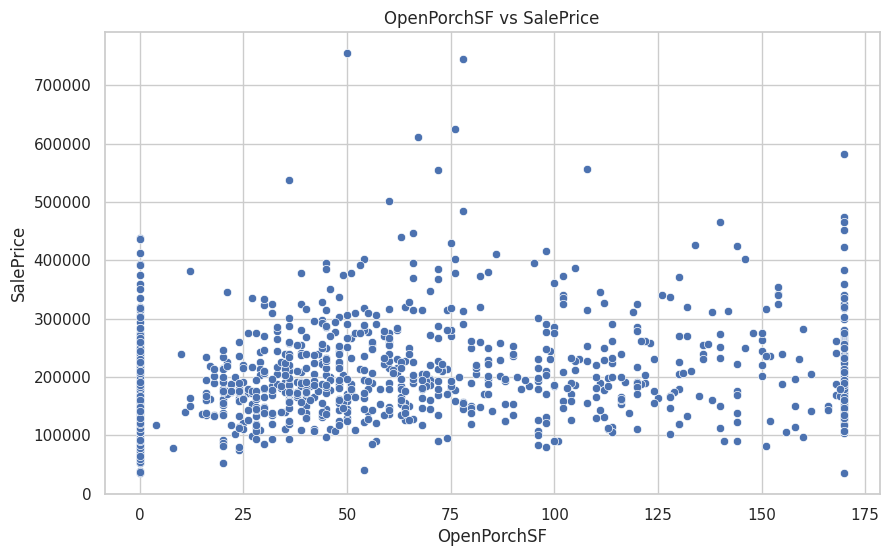

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter(df, variables, target='SalePrice'):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=var, y=target)
        plt.title(f'{var} vs {target}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.show()

plot_scatter(df_ohe, vars_to_study1)

**Summary of insights:**
1. Large first-floor areas are associated with higher sale prices.
2. Larger garage areas generally lead to higher sale prices.
3. There is a clear historical trend showing increased value for more recently built garages.
4. Larger above-ground living areas are associated with higher sale prices.
5. Slight increase in sale prices with larger open porch areas. Wide spread and variability in sale prices for similar porch sizes. Many properties with zero open porch area clustering at lower sale prices.
6. Larger basement areas are associated with higher sale prices. High-value properties with extensive basements.
7. Not surprisingly, houses built more recently generally have higher sale prices. Significant increase in sale prcies for houses built after 1980, especially after 2000. Some older houses have high sale prices, possibly due to renovations or historical value.
8. More recent remodels and additions are associated with higher sale prices. Notable increase in sale prices for houses remodeled after 2000.

Secondly we are making box plots, which are useful for visualizing the distribution of sale prices across different categorical variables.

In [15]:
vars_to_study2 = ['OverallQual', 'KitchenQual_Ex', 'KitchenQual_Gd']

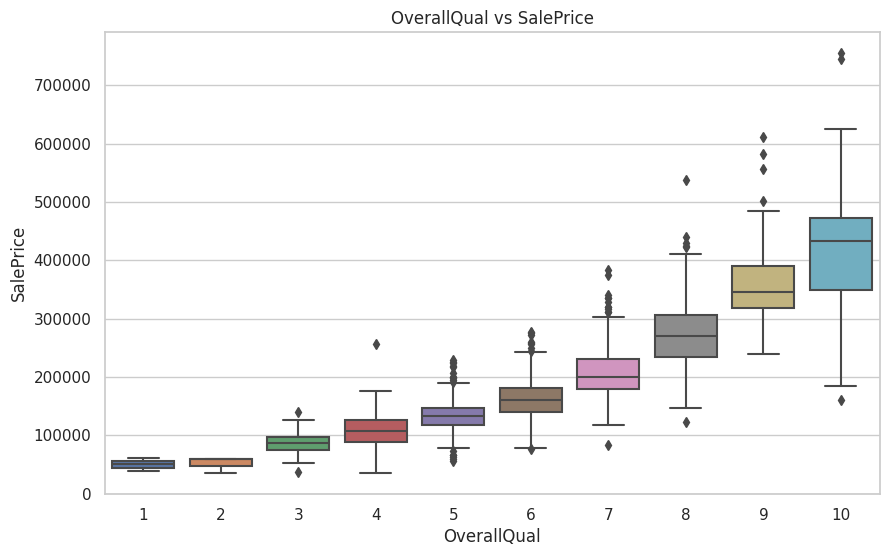

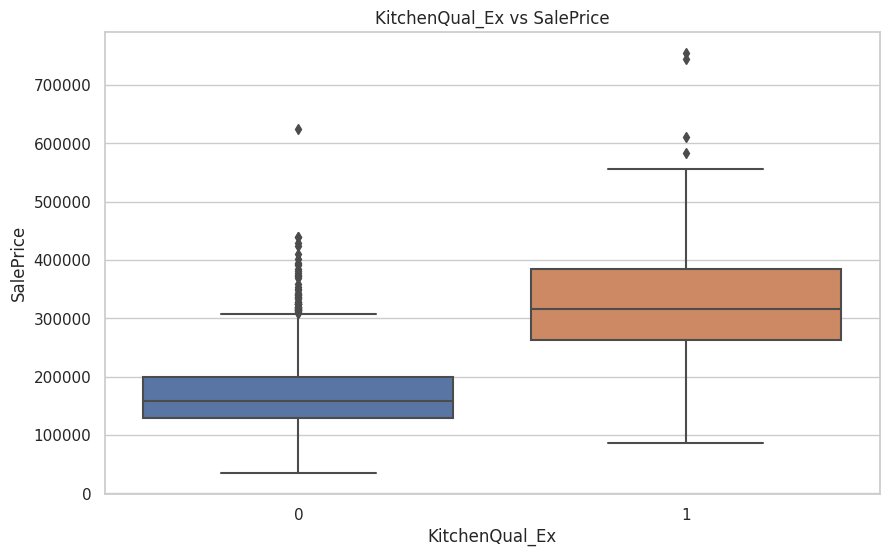

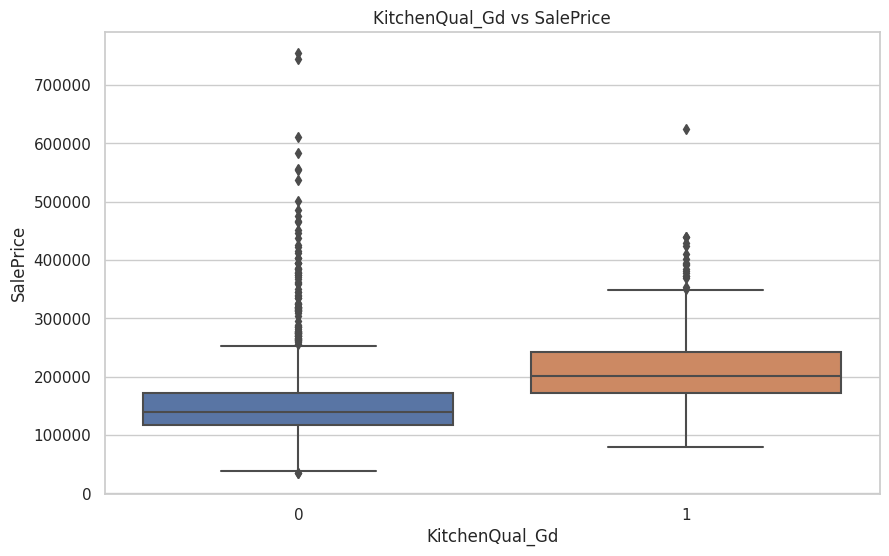

In [16]:
def plot_box(df, variables, target='SalePrice'):
    for var in variables:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x=var, y=target)
        plt.title(f'{var} vs {target}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.show()

plot_box(df_ohe, vars_to_study2)

**Box Plot Insights:**
1. Kitchen quality:
* Both excellent and good kitchen quality significantly contribute to higher sale prices. Howeverm the impact is more substantial for excellent kitchen quality.
2. Overall Quality:
* Overall quality has a strong positive correlation with sale prices, showing that higher overall quality ratings generally lead to higher sale prices.
3. Market Value:
* Houses with higher kitchen quality and overall quality not only command higher median prices but also show greater variability and a higher propensity for outliers in the upper price range.

---

## Summary: Understanding housing market dynamics

This notebook explored a dataset of housing features and sale prices ('HousePricesCleaned.csv') to uncover insights crucial for understanding housing market dynamics.
* Top influential features strongly correlated with higher sale prices:
    *  OverallQual, GrLivArea, YearBuilt, GarageArea, TotalBsmtSF, 1stFlrSF, YearRemodAdd, GarageYrBlt, KitchenQual and OpenPorchSF.

* Both Pearson and Spearman correlations were calculated to capture linear and monotonic relationships, respectively. This analysis helps in identifying features that exhibit strong associations with 'SalePrice'.

* Predictive Power Score: Used to detect linear and non-linear relationships, providing additional insights into feature importance beyond traditional correlation metrics.

* Scatter plots highlighted trends such as higher sale prices associated with larger living areas, newer construction, and extensive basement areas. Box plots showed the impact of kitchen quality and overall quality on sale prices.

Next step:
* Feature engineering